In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [89]:
data = pd.read_excel('Потребление электроэнергии на юго-востоке Бразилии.xls').transpose()

In [90]:
model = ETSModel(data[0], error='add', trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

C:\Users\Acer\PycharmProjects\task_10\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [91]:
START = '2017-01-01'
END = '2020-01-01'
FREQ = 'MS'
test_dates = pd.date_range(start=START, end=END, freq=FREQ)

In [92]:
res = fit.get_prediction(start=START, end=END)

In [93]:
result = res.summary_frame()

In [94]:
result

,mean,pi_lower,pi_upper
2017-01-01,9.368856e+05,6.382118e+05,1.235559e+06
2017-02-01,9.315461e+05,6.097951e+05,1.253297e+06
2017-03-01,1.125282e+06,7.819976e+05,1.468567e+06
2017-04-01,1.133064e+06,7.695155e+05,1.496613e+06
2017-05-01,1.158567e+06,7.758215e+05,1.541312e+06
2017-06-01,1.285653e+06,8.846257e+05,1.686681e+06
2017-07-01,1.349761e+06,9.312458e+05,1.768277e+06
2017-08-01,1.438411e+06,1.003106e+06,1.873715e+06
2017-09-01,1.580659e+06,1.129186e+06,2.032132e+06
2017-10-01,1.621571e+06,1.154486e+06,2.088656e+06


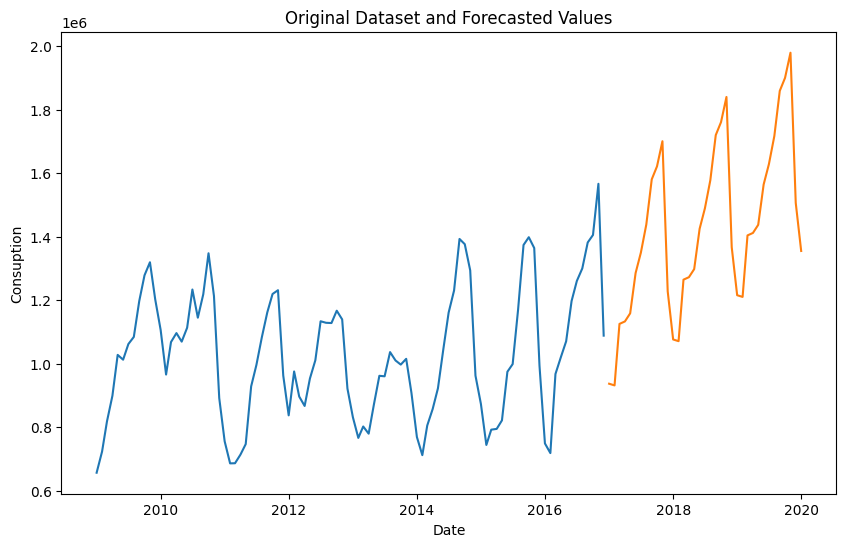

In [95]:
plt.figure(figsize=(10, 6))

plt.plot(data.index, data[0])

plt.plot(test_dates, res.predicted_mean)

plt.title('Original Dataset and Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Consuption')
plt.show()

In [96]:
index = int(0.8 * len(data))

train = data.iloc[:index]
test = data.iloc[index:]

model = ETSModel(train[0], error='add', trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()
res = fit.get_prediction(start=test.index[0], end=test.index[-1])

C:\Users\Acer\PycharmProjects\task_10\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


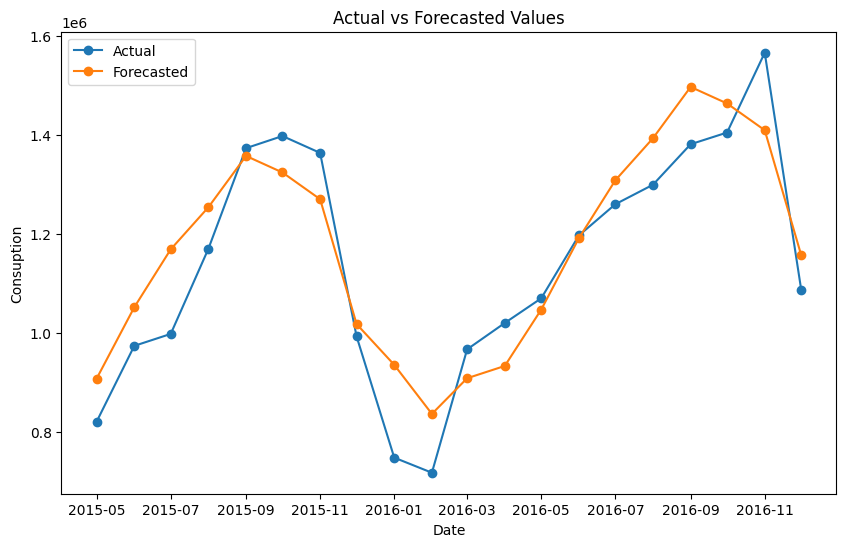

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test[0], label='Actual', marker='o')
plt.plot(test.index, res.predicted_mean, label='Forecasted', marker='o')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Consuption')
plt.legend()
plt.show()

In [98]:
mae = mean_absolute_error(test[0], res.predicted_mean)
rmse = np.sqrt(mean_squared_error(test[0], res.predicted_mean))
mape = np.mean(np.abs((test[0] - res.predicted_mean) / test[0])) * 100
r2 = r2_score(test[0], res.predicted_mean)

In [1]:
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'R^2 score: {r2:.2f}%')

NameError: name 'mae' is not defined